# Watching from above

## Data loading & Preprocessing

### x

In [2]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tqdm import tqdm
import numpy as np
import os
from PIL import Image

2022-12-05 16:44:10.483094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 16:44:10.874608: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-05 16:44:10.874659: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-05 16:44:15.143436: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [3]:
data_path = '/home/ludovica.baldi/code/pabloknecht/watching-from-above/raw_data/EuroSAT'
classes_name = os.listdir(os.path.join(data_path))

for i in range(len(classes_name)):
    images_per_cat = os.listdir(os.path.join(data_path, classes_name[i]))
    print(classes_name[i], len(images_per_cat))

River 2500
Forest 3000
Residential 3000
Highway 2500
Pasture 2000
PermanentCrop 2500
AnnualCrop 3000
SeaLake 3000
Industrial 2500
HerbaceousVegetation 3000


In [5]:
def load_data():
    data_path = '/home/ludovica.baldi/code/pabloknecht/watching-from-above/raw_data/EuroSAT'
    classes = {'AnnualCrop':0,
               'Forest':1,
               'HerbaceousVegetation':2,
               'Highway':3,
               'Industrial':4,
               'Pasture':5,
               'PermanentCrop':6,
               'Residential':7,
               'River':8,
               'SeaLake':9,
              }
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:3000]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((64, 64))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)
    return X, y

In [6]:
X, y = load_data()

100%|███████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3025.84it/s]


In [7]:
type(X)

numpy.ndarray

In [11]:
X.shape

(27000, 64, 64, 3)

In [9]:
type(y)

numpy.ndarray

In [10]:
y.shape

(27000, 10)

In [12]:
X_tensor = tf.convert_to_tensor(X)
y_tensor = tf.convert_to_tensor(y)

2022-12-05 16:47:56.596612: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-05 16:47:56.596672: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-05 16:47:56.596710: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (schneider-1091-ludovica-baldi): /proc/driver/nvidia/version does not exist
2022-12-05 16:47:56.597363: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 16:47:56.598397: W tensorflow/tsl/framework

In [14]:
type(X_tensor)

tensorflow.python.framework.ops.EagerTensor

In [17]:
X_tensor.shape

TensorShape([27000, 64, 64, 3])

In [ ]:
# Normalization still to be done

In [15]:
type(y_tensor)

tensorflow.python.framework.ops.EagerTensor

In [18]:
y_tensor.shape

TensorShape([27000, 10])

In [ ]:
def 

    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_flowers_data('direct')

100%|██████████| 299/299 [00:00<00:00, 372.35it/s]


❓ **Question: Exploring the images** ❓

Check the images' shapes and plot a few of them.

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(571, 256, 256, 3) (179, 256, 256, 3) (149, 256, 256, 3)


In [ ]:
y_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

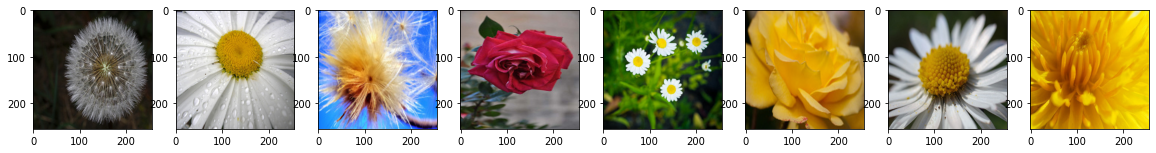

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_train[i])

## (4) A CNN architecture

First, let's build our own CNN.

❓ **Questions** ❓ 

1. <u>CNN Architecture and compiler:</u> Create a CNN with your own architecture and a function `load_own_model` that will be able to generate it. Some advice:
    - Incorporate the Rescaling Layer in your Sequential architecture
    - Add three Conv2D/MaxPooling2D combinations with an increasing number of channels and a decreasing size of kernels for example (be creative, that is not a rule of thumb, mastering CNN is an art)
    - Don't forget the Flatten layer and some hidden layers
    - Finish with the predictive layer
    - Compile your CNN model accordingly
  
  
2. <u>Training and comparison</u>:
    - Train your CNN
    - Compare its performance to a baseline accuracy

<details>
    <summary><i>Recommended architecture:</i></summary>

```python
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = Sequential()

# Notice this cool new layer that "pipe" your rescaling within the architecture
model.add(Rescaling(1./255, input_shape=(256,256,3)))

# Lets add 3 convolution layers, with relatively large kernel size as our pictures are quite big too
model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
model.add(layers.MaxPooling2D(3))

model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
```

        
</details>        

In [ ]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def load_own_model():

    model = Sequential()
    model.add(Rescaling(1./255, input_shape=(256,256,3)))

    model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
    model.add(layers.MaxPooling2D(3))
    
    model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
    model.add(layers.MaxPooling2D(3))

    model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
    model.add(layers.MaxPooling2D(3))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [ ]:
model_homemade = load_own_model()
model_homemade.summary()

2022-08-11 17:36:24.075246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 247, 247, 16)      4816      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 82, 82, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 32)        3

2022-08-11 17:36:24.103601: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-11 17:36:24.103942: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-11 17:36:24.105371: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-11 17:36:24.106331: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model_homemade.fit(X_train, y_train,
                             validation_data = (X_val, y_val),
                             batch_size = 16, 
                             epochs = 100, 
                             callbacks=[es])

Epoch 1/100


2022-08-11 17:36:27.806918: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8100
2022-08-11 17:36:28.355780: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-11 17:36:28.369655: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-11 17:36:28.369726: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-08-11 17:36:28.384621: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-11 17:36:28.384774: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


36/36 [==============================] - 4s 51ms/step - loss: 1.0774 - accuracy: 0.4011 - val_loss: 1.0430 - val_accuracy: 0.4581
Epoch 2/100
36/36 [==============================] - 1s 24ms/step - loss: 1.0109 - accuracy: 0.4974 - val_loss: 0.9421 - val_accuracy: 0.5419
Epoch 3/100
36/36 [==============================] - 1s 23ms/step - loss: 0.8875 - accuracy: 0.5972 - val_loss: 0.7926 - val_accuracy: 0.6704
Epoch 4/100
36/36 [==============================] - 1s 23ms/step - loss: 0.7966 - accuracy: 0.6515 - val_loss: 0.8136 - val_accuracy: 0.6425
Epoch 5/100
36/36 [==============================] - 1s 24ms/step - loss: 0.7622 - accuracy: 0.6550 - val_loss: 0.7484 - val_accuracy: 0.6760
Epoch 6/100
36/36 [==============================] - 1s 23ms/step - loss: 0.7400 - accuracy: 0.6725 - val_loss: 0.7257 - val_accuracy: 0.6983
Epoch 7/100
36/36 [==============================] - 1s 22ms/step - loss: 0.7307 - accuracy: 0.6848 - val_loss: 0.7798 - val_accuracy: 0.6480
Epoch 8/100
36/36 

In [ ]:
res = model_homemade.evaluate(X_test, y_test)
res

5/5 [==============================] - 0s 49ms/step - loss: 0.6542 - accuracy: 0.7047


[0.6542359590530396, 0.7046979665756226]

In [ ]:
test_accuracy = res[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

test_accuracy = 70.0 %


🥡 <b><u>Takeaways from building your own CNN</u></b>:
* On an "easy dataset" like the MNIST, it is now easy to reach a decent accuracy. But for a more complicated problem like classifying flowers, it already becomes more challenging. Take a few minutes to play with the following link before moving on to Transfer Learning
    * [PoloClub/CNN-Explainer](https://poloclub.github.io/cnn-explainer/)

## (5) Using a pre-trained CNN = Transfer learning

As we said in the beginning, tech companies and university labs have more computational resources than we do.

🔥 The [**Visual Geometry Group**](https://www.robots.ox.ac.uk/~vgg/data/) *(Oxford University, Department of Science and Engineering)* became famous for some of their **Very Deep Convolutional Neural Networks**: the [**VGG16**](https://www.robots.ox.ac.uk/~vgg/research/very_deep/)

Take 7 minutes of your time to watch this incredible video of Convolutional Layers created by Dimitri Dmitriev.

* 📺 **[VGG16 Neural Network Visualization](https://www.youtube.com/watch?v=RNnKtNrsrmg)**


### (5.1) Load VGG16 model

❓ **Question: loading the VGG16** ❓ 

* Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Have a look at the documentation 📚  [tf/keras/applications/VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16)📚

* We will **load the VGG16 model** the following way:
    - 🤯 Let's use the **weights** learned on the [**imagenet dataset**](https://www.image-net.org/download.php) (14M pictures with 20k labels)
    - The **`input_shape`** corresponds to the input shape of your images 
        - Note: *You have to resize them down to a consistent shape if they have different height/widths/channels*
    - The **`include_top`** argument should be set to `False`: 
        - to avoid loading the weights of the fully-connected layers of the VGG16
        - and also remove the last layer of the VGG16 which was specifically trained on `imagenet`

<i><u>Remark:</u></i> Do not change the default value of the other arguments

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    
    # $CHALLENGIFY_BEGIN
    
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    
    # $CHALLENGIFY_END
    
    return model

❓ **Question: number of parameters in the VGG16** ❓ 

Look at the architecture of the model using ***.summary()***

In [ ]:
model = load_model()
model.summary()

58900480/58889256 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png">

💪 Impressive, right? Two things to notice:
- It ends with a combo Conv2D/MaxPooling2D 
- The `layers.Flatten` and the `layers.Dense` are not there yet, we need to add them.
- There are more than 14,000,000 parameters, which is a lot... 
    - We could fine-tune them, i.e. update them as we will update the weights of the dense layers, but it will take a lot of time....
    - For this reason, we will inform the model that the layers before the flattening will be set non-trainable.

---

❓ **Question: deactivating the training of the VGG16 paramters** ❓ 

* Write a first function which:
    - takes the previous model as the input
    - sets the first layers to be non-trainable, by applying **`model.trainable = False`**
    - returns the model.

* Then inspect the summary of the model to check that the parameters are no longer trainable, they were set to be **`non-trainable`**.



In [ ]:
def set_nontrainable_layers(model):
    
    # $CHALLENGIFY_BEGIN
    # Set the first layers to be untrainable
    model.trainable = False
    
    # $CHALLENGIFY_END
    
    return model

In [ ]:
model = set_nontrainable_layers(model)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

❓ **Question: chaining the pretrained convolutional layers of VGG16 with our own dense layers** ❓ 

We will write a function that adds flattening and dense layers after the convolutional layers. To do so, we cannot directly use the classic `layers.Sequential()` instantiation.

For that reason, we will discover another way here. The idea is that we define each layer (or group of layers) separately. Then, we concatenate them. Have a look at this example: 

---
```python
base_model = load_model()
base_model = set_nontrainable_layers(base_model)
flattening_layer = layers.Flatten()
dense_layer = layers.Dense(SOME_NUMBER_1, activation='relu')
prediction_layer = layers.Dense(SOME_NUMBER_2, activation='APPROPRIATE_ACTIVATION')

model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])

```
---

* The first line loads a group of layers which is the previous VGG-16 model. 
* Then, we set these layers to be non-trainable.
* Eventually, we can instantiate as many layers as we want.
* Finally, we use the `Sequential` with the sequence of layers that will correspond to our overall neural network. 

Replicate the following steps by adding:
* a flattening layer
* two dense layers (the first with 500 neurons) to the previous VGG-16 model.

In [ ]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(3, activation='softmax')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

❓ **Question: inspect the parameters of a customized VGG16** ❓ 

* Now look at the layers and the parameters of your model. 
* Note that there is a distinction, at the end, between the **trainable** and **non-trainable parameters**

In [ ]:
model = add_last_layers(model)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 500)               16384500  
                                                                 
 dense_3 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 31,100,691
Trainable params: 16,386,003
Non-trainable params: 14,714,688
_________________________________________________________________


❓ **Question: building a function that creates a full customized VGG16 and compiles it** ❓ 

* Write a function which builds and compiles your model
    * We advise using the _adam_ optimizer with `learning_rate=1e-4`. 

In [ ]:
from tensorflow.keras import optimizers

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
    # $CHALLENGIFY_END

In [ ]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 500)               16384500  
                                                                 
 dense_5 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 31,100,691
Trainable params: 16,386,003
Non-trainable params: 14,714,688
_________________________________________________________________


### (5.2) Back to the data

🚨 The VGG16 model was trained on images which were preprocessed in a specific way. This is the reason why we did _NOT_ normalize them earlier.

❓ **Question: preprocessing the dataset** ❓ 

Apply the specific processing to the original (non-normalized) images here using the method **`preprocess_input`** that you can import from **`tensorflow.keras.applications.vgg16`**

📚 Cf. [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
X_train = preprocess_input(X_train) 
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

### (5.3)  Fit the model



❓ **Question: Training the customized VGG16** ❓ 

* Train the model with an Early stopping criterion on the validation accuracy -
* Since the validation data is provided use `validation_data` instead of `validation_split`.

_As usual, store the results of your training into a `history` variable._

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = build_model()

es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

2022-08-11 17:36:49.432294: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 449052672 exceeds 10% of free system memory.
2022-08-11 17:36:49.856428: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 449052672 exceeds 10% of free system memory.


Epoch 1/50
36/36 [==============================] - 8s 148ms/step - loss: 2.6860 - accuracy: 0.8039 - val_loss: 1.5448 - val_accuracy: 0.9106
Epoch 2/50
36/36 [==============================] - 2s 65ms/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 1.9953 - val_accuracy: 0.9106
Epoch 3/50
36/36 [==============================] - 3s 71ms/step - loss: 0.0029 - accuracy: 0.9982 - val_loss: 1.8299 - val_accuracy: 0.9106
Epoch 4/50
36/36 [==============================] - 3s 72ms/step - loss: 9.6886e-07 - accuracy: 1.0000 - val_loss: 1.8281 - val_accuracy: 0.9106
Epoch 5/50
36/36 [==============================] - 2s 68ms/step - loss: 5.2880e-07 - accuracy: 1.0000 - val_loss: 1.8278 - val_accuracy: 0.9106
Epoch 6/50
36/36 [==============================] - 2s 69ms/step - loss: 4.3090e-07 - accuracy: 1.0000 - val_loss: 1.8274 - val_accuracy: 0.9106
Epoch 00006: early stopping


❓ **Question: Looking at the accuracy** ❓ 

Plot the accuracy for both the train set and and the validation set using the usual function below

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

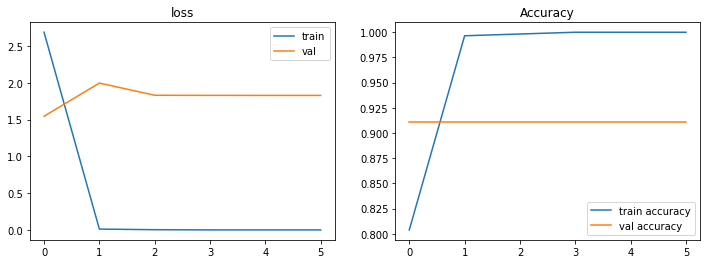

In [ ]:
plot_history(history)

❓ **Question: Evaluating the model** ❓

Evaluate the customized VGG16 accuracy on the test set. Did we improve?

In [ ]:
res_vgg = model.evaluate(X_test, y_test)

test_accuracy_vgg = res_vgg[-1]


print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f"test_accuracy = {round(test_accuracy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')



5/5 [==============================] - 6s 774ms/step - loss: 1.0693 - accuracy: 0.9262
test_accuracy_vgg = 93.0 %
test_accuracy = 70.0 %
Chance level: 33.3%


## (6) (Optional) Improve the model

Now, you can try to improve the model's test accuracy. To do that, here are some options you can consider

1. **Unfreeze and finetune**: Source: [Google tutorial](https://www.tensorflow.org/guide/keras/transfer_learning#fine-tuning) 
>_Once your model has converged on the new data, you can try to unfreeze all or part of the base model and retrain the whole model end-to-end with a very low learning rate. This is an optional last step that can potentially give you incremental improvements. It could also potentially lead to quick overfitting -- keep that in mind. It is critical to only do this step after the model with frozen layers has been trained to convergence. If you mix randomly-initialized trainable layers with trainable layers that hold pre-trained features, the randomly-initialized layers will cause very large gradient updates during training, which will destroy your pre-trained features. It's also critical to use a very low learning rate at this stage, because you are training a much larger model than in the first round of training, on a dataset that is typically very small. As a result, you are at risk of overfitting very quickly if you apply large weight updates. Here, you only want to readapt the pretrained weights in an incremental way._


1. Add **Data Augmentation** if your model is overfitting. 

2. If your model is not overfitting, try a more complex model.

3. Perform a precise **Grid Search** on all the hyper-parameters: learning_rate, batch_size, data augmentation etc...

4. **Change the base model** to more modern one CNN (ResNet, EfficientNet1,... available in the keras library)

5. Curate the data: maintaining a sane data set is one of the keys to success.

6. Collect more data

## (6.1) Data augmentation


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    brightness_range = (0.5, 1.),
    zoom_range = (0.3, 1.5))


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

model_data_aug = build_model()

train_flow = datagen.flow(X_train, y_train, batch_size=16)
val_flow = datagen.flow(X_val, y_val, batch_size=16)

es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history_data_aug = model_data_aug.fit(train_flow,
                                      validation_data = val_flow, 
                                      epochs = 50,
                                      callbacks = [es])

Epoch 1/50
36/36 [==============================] - 10s 264ms/step - loss: 2.9726 - accuracy: 0.7320 - val_loss: 2.0714 - val_accuracy: 0.8380
Epoch 2/50
36/36 [==============================] - 10s 291ms/step - loss: 1.2247 - accuracy: 0.8757 - val_loss: 1.5320 - val_accuracy: 0.8715
Epoch 3/50
36/36 [==============================] - 9s 236ms/step - loss: 1.3173 - accuracy: 0.8564 - val_loss: 1.9667 - val_accuracy: 0.8547
Epoch 4/50
36/36 [==============================] - 9s 237ms/step - loss: 1.0258 - accuracy: 0.8897 - val_loss: 1.5195 - val_accuracy: 0.8380
Epoch 5/50
36/36 [==============================] - 9s 253ms/step - loss: 0.5772 - accuracy: 0.9089 - val_loss: 1.2723 - val_accuracy: 0.8771
Epoch 6/50
36/36 [==============================] - 9s 240ms/step - loss: 0.7052 - accuracy: 0.9264 - val_loss: 1.4745 - val_accuracy: 0.8715
Epoch 7/50
36/36 [==============================] - 10s 278ms/step - loss: 0.6522 - accuracy: 0.9054 - val_loss: 0.8616 - val_accuracy: 0.9274
Epo

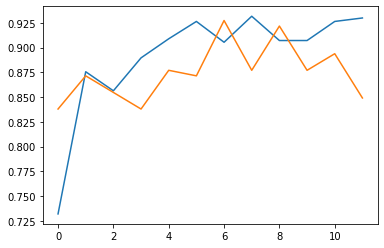

In [ ]:
plt.plot(history_data_aug.history['accuracy'])
plt.plot(history_data_aug.history['val_accuracy'])
plt.show()

In [ ]:
res_aug = model_data_aug.evaluate(X_test, y_test)

5/5 [==============================] - 6s 95ms/step - loss: 0.8715 - accuracy: 0.9060


## (6.2) Comparing the performances of the CNN, the VGG, and the VGG trained on the augmented dataset

In [ ]:
test_accuracy_aug = res_aug[-1]


print(f"test_accuracy_aug = {round(test_accuracy_aug,2)*100} %")

print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f"test_accuracy = {round(test_accuracy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')



test_accuracy_aug = 91.0 %
test_accuracy_vgg = 93.0 %
test_accuracy = 70.0 %
Chance level: 33.3%


---

🏁 **Congratulations** 🏁 

1. Download this notebook from your `Google Drive` or directly from `Google Colab` 
2. Drag-and-drop it from your `Downloads` folder to your local challenge folder  


💾 Don't forget to push your code

3. Follow the usual procedure on your terminal inside the challenge folder:
      * *git add cifar_classification.ipynb*
      * *git commit -m "I am the god of Transfer Learning"*
      * *git push origin master*

*Hint*: To find where this Colab notebook has been saved, click on `File` $\rightarrow$ `Locate in Drive`.

🚀 If you have time, move on to the **Autoencoders** challenge!